In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import seaborn as sns
from sklearn.metrics import f1_score,mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
df=pd.read_csv("/content/column_2C_weka.csv")
df.head(4)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [ ]:
df['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [ ]:
encode = LabelEncoder()
cat = encode.fit_transform(df['class'])

In [ ]:
x=df.drop(['class'],axis=1)
y=cat

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model =KNeighborsClassifier(metric='manhattan',n_neighbors=5)
model.fit(xtrain,ytrain)

KNeighborsClassifier(metric='manhattan')

In [ ]:
model.score(xtrain,ytrain)

0.9032258064516129

In [ ]:
model.score(xtest,ytest)

0.7903225806451613

In [ ]:
y_pred=model.predict(xtrain)

In [ ]:
f1_score(ytrain, y_pred)

0.8536585365853658

In [ ]:
y_pred1=model.predict(xtest)

In [ ]:
f1_score(ytest,y_pred1)

0.6060606060606061

#daimond dataset

In [ ]:
df1=pd.read_csv("/content/diamonds.csv")
df1.head(4)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


<Axes: ylabel='price'>

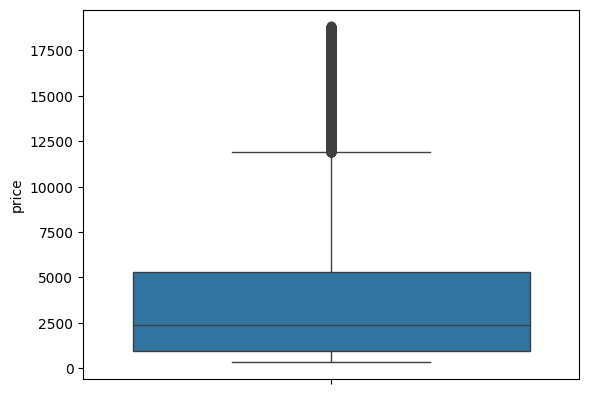

In [ ]:
sns.boxplot(df1['price'])

In [ ]:
x=df1.drop(['price'],axis=1)
y=df1['price']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
num_col=xtrain.select_dtypes(include='number').columns
cat_col=xtrain.select_dtypes(exclude='number').columns

In [ ]:
preprocessing=ColumnTransformer([
    ('scaler',StandardScaler(),num_col),
    ('label_encoder',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),cat_col)
]
)

In [ ]:
pipeline=Pipeline([
    ('preprocessing',preprocessing),
    ('model',KNeighborsRegressor(metric='manhattan',n_neighbors=5))
])
pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')),
                                                 ('label_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['cut', 'color', 'clarity'], dtype='object'))])),
                ('model', KNeighborsRegressor(metric='manhattan'))])

In [ ]:
pipeline.score(xtrain,ytrain)

0.9860706301949542

In [ ]:
pipeline.score(xtest,ytest)

0.9780001091719642

In [ ]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid={
        'model__n_neighbors': [3],
        'model__metric': ['manhattan']
    },
    cv=3,
    verbose=1,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(xtrain, ytrain)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         Index(['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')),
                                                                        ('label_encoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['cut', 'color', 'clarity'], dtype='object'))])),
                                       ('model',
                                        KNeighborsRegressor(metric='manhattan'))]),
             n_jobs=-1,
             param_grid={'model__metric': ['manhattan'],
                         'model__n_neighbors': [3]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
grid_search.best_params_

{'model__metric': 'manhattan', 'model__n_neighbors': 3}

In [ ]:
model = grid_search.best_estimator_

In [ ]:
model.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')),
                                                 ('label_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['cut', 'color', 'clarity'], dtype='object'))])),
                ('model',
                 KNeighborsRegressor(metric='manhattan', n_neighbors=3))])

In [ ]:
model.score(xtrain,ytrain)

0.9894929835786052

In [ ]:
model.score(xtest,ytest)

0.9772780183358801

In [ ]:
y_pred=model.predict(xtrain)

In [ ]:
y_pred1=model.predict(xtest)

In [ ]:
mean_squared_error(ytrain,y_pred)

167268.956407325

In [ ]:
mean_squared_error(ytest,y_pred1)

361207.28553330863